<a href="https://colab.research.google.com/github/dwaidatta/ds-from-scratch/blob/main/gradient_descent_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

Fundamental optimization algorithm to minimize the cost/loss function which measures how well a model fits to the given data.

In [10]:
# importing modules
import random
import matplotlib.pyplot as plt

$$
\text{Let us have a function: }
f(x) = y = 20x + 5 , -10 \leq x \leq 10 \\
\therefore y_{i} = 20x_{i} + 5 \space \forall x_{i} \in \{-10, -9, ..., 9, 10\}
$$

In [11]:
x_values = [x for x in range(-10, 11)] # values for x
y_values = [(20*x+5) for x in x_values] # true y for values of x

n = len(x_values)

In [12]:
step = 0.001 # learning rate
epochs = 5000

# randomly select w and b
w = random.uniform(-5, 5)
b = random.uniform(-5, 5)

w_values = []
b_values = []

w_values.append(w)
b_values.append(b)

cost_values = []

$$
\text{Let predicted value of y be: }
\hat{y}_{i} = w_{i}x + b_{i}, -10 \leq x \leq 10
$$

$$
\therefore \text{The cost/loss function is: }
\large J(w,b) = \frac{1}{n} \displaystyle\sum_{i=1}^n (y_{i} - \hat{y}_{i})^2
$$

$$
\text{Now, }
\frac{\partial J(w,b)}{\partial w} = \frac{-2}{n} \displaystyle\sum_{i=1}^n (y_{i} - \hat{y}_{i}) (x_{i})
$$

$$
\text{ and, } \frac{\partial J(w,b)}{\partial b} = \frac{-2}{n} \displaystyle\sum_{i=1}^n (y_{i} - \hat{y}_{i})
$$

$$
\text{Let step } = \alpha \\
w_{new} = w - \alpha \frac{\partial J(w,b)}{\partial w} \\
b_{new} = b - \alpha \frac{\partial J(w,b)}{\partial b}
$$

In [13]:
for i in range(epochs):
  y_pred = [w*x+b for x in x_values]
  cost = sum(((y_i - y_pred_i)**2
              for y_i, y_pred_i in zip(y_values, y_pred))) / n
  cost_values.append(cost)

  dw = -2 * sum((y_i - y_pred_i)*x_i
        for y_i, y_pred_i, x_i in zip(y_values, y_pred, x_values)) / n
        # partial differentiation of J wrt w
  db = -2 * sum((y_i - y_pred_i)
        for y_i, y_pred_i in zip(y_values, y_pred)) / n
        # partial differentiation of J wrt b

  w = w - step*dw
  b = b - step*db

  w_values.append(w)
  b_values.append(b)

In [14]:
y_pred_final = [w*x+b for x in x_values] # predicted y values based on final w
                                         # and b values

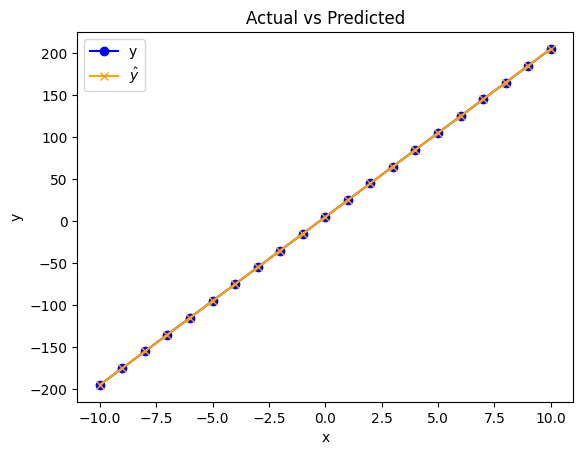

In [15]:
plt.plot(x_values, y_values, color='blue', marker='o', label='y')
plt.plot(x_values, y_pred, color='orange', marker='x', label='$\hat{y}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

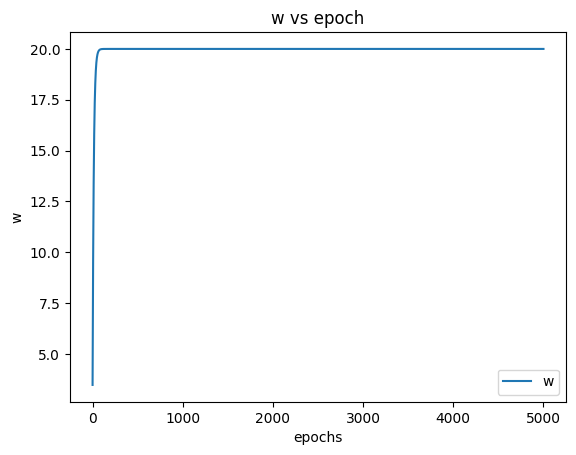

In [16]:
x_axis = range(epochs+1)
plt.plot(x_axis, w_values, label='w')
plt.xlabel('epochs')
plt.ylabel('w')
plt.title('w vs epoch')
plt.legend()
plt.show()

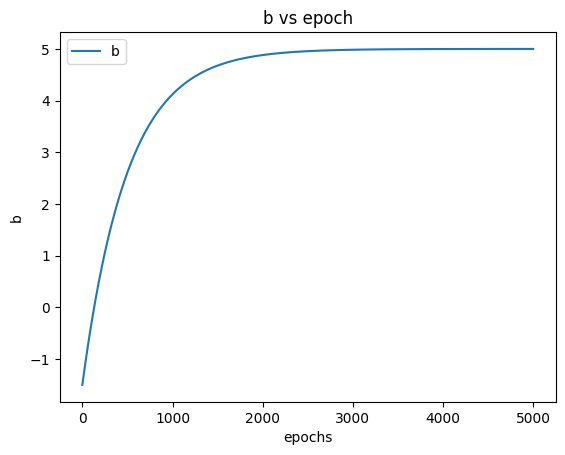

In [17]:
x_axis = range(epochs+1)
plt.plot(x_axis, b_values, label='b')
plt.xlabel('epochs')
plt.ylabel('b')
plt.title('b vs epoch')
plt.legend()
plt.show()

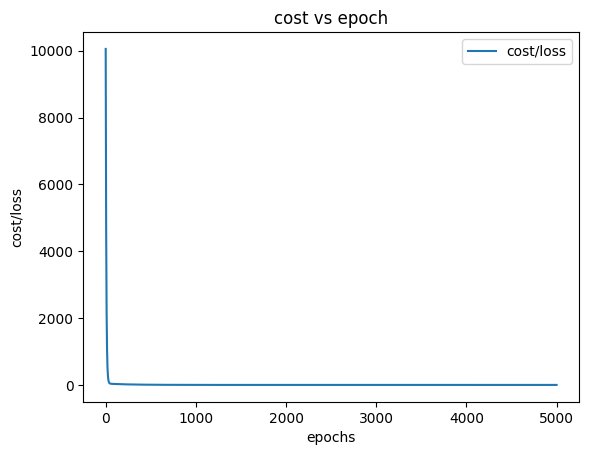

In [18]:
x_axis = range(epochs)
plt.plot(x_axis, cost_values, label='cost/loss')
plt.xlabel('epochs')
plt.ylabel('cost/loss')
plt.title('cost vs epoch')
plt.legend()
plt.show()